<a href="https://colab.research.google.com/github/paveethranswam/Speech-style-transfer-and-ASR/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [4]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [5]:
# Set torch random seed 
torch.manual_seed(42)
np.random.seed(42)
torch.backends.cudnn.enabled = False
torch.backends.cudnn.deterministic = True

In [6]:
!pip install torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import os

import IPython
import requests
import torchaudio
from IPython.display import Audio, display

In [ ]:
!unzip "/content/drive/My Drive/DLS_Project/Dataset/DR-VCTK/DR-VCTK.zip" -d "./DR-VCTK"

In [9]:
os.makedirs("./VCTK/", exist_ok=True)

In [ ]:
!unzip "/content/drive/My Drive/DLS_Project/Dataset/VCTK/VCTK-Corpus-0.92.zip" -d "./VCTK/VCTK-Corpus-0.92/"

In [20]:
DR_VCTK_DATASET_PATH = "./DR-VCTK/"

In [21]:
os.makedirs(DR_VCTK_DATASET_PATH, exist_ok=True)
print(DR_VCTK_DATASET_PATH)

./DR-VCTK/


In [30]:
O_PATH = "/content/drive/My Drive/DLS_Project/Dataset/English_Speakers/"
O2_PATH = "/content/drive/My Drive/DLS_Project/Dataset/Indian_Speakers/"

os.makedirs(O_PATH, exist_ok=True)
os.makedirs(O2_PATH, exist_ok=True)

In [23]:
VCTK_DATASET_PATH = "./VCTK/"

In [24]:
os.makedirs(VCTK_DATASET_PATH, exist_ok=True)
print(VCTK_DATASET_PATH)

./VCTK/


In [25]:
vctk_dataset = torchaudio.datasets.VCTK_092(VCTK_DATASET_PATH ,download=False)

In [26]:
def play_audio(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    if num_channels == 1:
        display(Audio(waveform[0], rate=sample_rate))
    elif num_channels == 2:
        display(Audio((waveform[0], waveform[1]), rate=sample_rate))
    else:
        raise ValueError("Waveform with more than 2 channels are not supported.")

In [27]:
# Generating dataset of Indian accented speech and English accented speech for GAN

In [31]:
# Getting precomputed transcript mapping
import pickle
from google.colab import files

with open('./final_w2v_transcript_dictionary2.pkl', 'rb') as f:
    speaker_utterance_final = pickle.load(f)

In [43]:
# Getting samples in the VCTK dataset
e_i = 0
i_i = 0

for sample_id, sample in enumerate(vctk_dataset):
  waveform, sample_rate, transcript, speaker_id, utterance_id = sample

  if (speaker_id in ['p248', 'p376', 'p251']) and i_i<100:
    i_i += 1
    resampler = torchaudio.transforms.Resample(48000, 16000, dtype=waveform.dtype)

    resampled_waveform = resampler(waveform)

    path = 'indian_'+speaker_id+"_"+utterance_id+".wav"

    path_save = os.path.join(O2_PATH,path)
    torchaudio.save(path_save, resampled_waveform, 16000)

  elif (speaker_id in ['p225', 'p226', 'p227']) and e_i <100:
    e_i += 1
    resampler = torchaudio.transforms.Resample(48000, 16000, dtype=waveform.dtype)

    resampled_waveform = resampler(waveform)

    path = 'english_'+speaker_id+"_"+utterance_id+".wav"

    path_save = os.path.join(O_PATH,path)
    torchaudio.save(path_save, resampled_waveform, 16000)

    # print("Waveform, Sample Rate: {}".format(sample_rate))
    # play_audio(waveform, sample_rate) 
    # play_audio(resampled_waveform, 16000) 

  # print('Sample ID: {}, Speaker ID: {}, Utterance ID: {}, Transcript: {}'.format(sample_id,speaker_id, utterance_id, transcript))

  # break

In [ ]:
# Converting Flac to WAV

# file_path = PurePath("test.flac")

# flac_tmp_audio_data = AudioSegment.from_file(file_path, file_path.suffix[1:])

# flac_tmp_audio_data.export(file_path.name.replace(file_path.suffix, "") + ".wav", format="wav")

In [32]:
drvctk_train_dataset = torchaudio.datasets.DR_VCTK(DR_VCTK_DATASET_PATH, subset='train',download=False)

In [33]:
drvctk_test_dataset = torchaudio.datasets.DR_VCTK(DR_VCTK_DATASET_PATH, subset='test',download=False)

In [34]:
print(len(drvctk_train_dataset))
print(len(drvctk_test_dataset))

11572
824


In [35]:
# Testing one sample in the DR-VCTK dataset
for sample_id, sample in enumerate(drvctk_train_dataset):
  clean_waveform, clean_waveform_sample_rate, noisy_waveform, noisy_waveform_sample_rate, speaker_id, utterance_id, source, channel_id = sample

  print("Clean Waveform, Sample Rate: {}".format(clean_waveform_sample_rate))
  play_audio(clean_waveform, clean_waveform_sample_rate) 

  print("Noisy Waveform, Sample Rate: {}".format(noisy_waveform_sample_rate))
  play_audio(noisy_waveform, noisy_waveform_sample_rate) 

  print('Sample ID: {}, Speaker ID: {}, Utterance ID: {}, Source: {}, Channel ID: {}'.format(sample_id,speaker_id, utterance_id, source, channel_id))

  break
  


Clean Waveform, Sample Rate: 16000


Noisy Waveform, Sample Rate: 16000


Sample ID: 0, Speaker ID: p226, Utterance ID: 001, Source: DR-VCTK_Office1_ClosedWindow, Channel ID: 1


In [37]:
# Testing random sample from dr-vctk

clean_waveform, clean_waveform_sample_rate, noisy_waveform, noisy_waveform_sample_rate, speaker_id, utterance_id, source, channel_id = drvctk_train_dataset[45]

print("Clean Waveform, Sample Rate: {}".format(clean_waveform_sample_rate))
play_audio(clean_waveform, clean_waveform_sample_rate) 

print("Noisy Waveform, Sample Rate: {}".format(noisy_waveform_sample_rate))
play_audio(noisy_waveform, noisy_waveform_sample_rate) 

sample_transcript = speaker_utterance_final[speaker_id][utterance_id]

print('Sample ID: {}, Speaker ID: {}, Utterance ID: {}, Source: {}, Channel ID: {}'.format(sample_id,speaker_id, utterance_id, source, channel_id))
print("Sample Transcript: {}".format(sample_transcript))

Clean Waveform, Sample Rate: 16000


Noisy Waveform, Sample Rate: 16000


Sample ID: 0, Speaker ID: p226, Utterance ID: 048, Source: DR-VCTK_Office1_ClosedWindow, Channel ID: 2
Sample Transcript: IT'S|A|BLESSING|


In [ ]:
speaker_utterance_final

In [ ]:
# Hmm, not seeing the transcripts to go with the audio in the small subset noisy dr-vctk data
# Going to try and get it from VCTK

In [39]:
print(len(vctk_dataset))

43873


In [ ]:
# All the speeches from speaker p315 will be skipped due to the lack of the corresponding text files.

# All the speeches from p280 will be skipped for mic_id="mic2" due to the lack of the audio files.

# Some of the speeches from speaker p362 will be skipped due to the lack of the audio files.

In [40]:
# Testing one sample in the VCTK dataset
for sample_id, sample in enumerate(vctk_dataset):
  waveform, sample_rate, transcript, speaker_id, utterance_id = sample

  print("Waveform, Sample Rate: {}".format(sample_rate))
  play_audio(waveform, sample_rate) 

  print('Sample ID: {}, Speaker ID: {}, Utterance ID: {}, Transcript: {}'.format(sample_id,speaker_id, utterance_id, transcript))

  break

Waveform, Sample Rate: 48000


Sample ID: 0, Speaker ID: p225, Utterance ID: 001, Transcript: Please call Stella.



In [41]:
waveform, sample_rate, transcript, speaker_id, utterance_id = vctk_dataset[11]
print("Waveform, Sample Rate: {}".format(sample_rate))
play_audio(waveform, sample_rate) 

print('Sample ID: {}, Speaker ID: {}, Utterance ID: {}, Transcript: {}'.format(sample_id,speaker_id, utterance_id, transcript))

Waveform, Sample Rate: 48000


Sample ID: 0, Speaker ID: p225, Utterance ID: 012, Transcript: Throughout the centuries people have explained the rainbow in various ways.



In [ ]:
# Getting mapping from speakers and utternaces to transcripts

speakers_set = set()
utterances_set = set()
utterances = {}
speaker_utterance = {}
i = 0
for sample_id, sample in enumerate(vctk_dataset):
  waveform, sample_rate, transcript, speaker_id, utterance_id = sample

  i += 1

  if i % 10000 == 0:
    print("Progress: " + str(i))

  utterances[utterance_id] = transcript
  speakers_set.add(speaker_id)
  utterances_set.add(utterance_id)

  if speaker_id not in speaker_utterance:
    speaker_utterance[speaker_id] = {}
    speaker_utterance[speaker_id][utterance_id] = transcript
  else:
    speaker_utterance[speaker_id][utterance_id] = transcript




Progress: 10000
Progress: 20000
Progress: 30000
Progress: 40000


In [ ]:
print(utterances.keys())

dict_keys(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '033', '035', '036', '037', '038', '039', '040', '044', '045', '046', '049', '051', '052', '053', '054', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '070', '071', '072', '073', '081', '082', '083', '084', '086', '089', '090', '092', '094', '103', '104', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '120', '121', '122', '123', '124', '126', '127', '128', '131', '133', '135', '136', '141', '142', '143', '144', '145', '147', '149', '150', '151', '152', '153', '156', '157', '158', '159', '165', '166', '169', '171', '172', '173', '174', '175', '176', '177', '179', '182', '191', '192', '193', '195', '196', '197', '199', '200', '201', '202', '203', '208', '210', '211', '212', '218', '219', '220', '221', '222', '223', '2

In [ ]:
print(speaker_utterance.keys())

dict_keys(['p225', 'p226', 'p227', 'p228', 'p229', 'p230', 'p231', 'p232', 'p233', 'p234', 'p236', 'p237', 'p238', 'p239', 'p240', 'p241', 'p243', 'p244', 'p245', 'p246', 'p247', 'p248', 'p249', 'p250', 'p251', 'p252', 'p253', 'p254', 'p255', 'p256', 'p257', 'p258', 'p259', 'p260', 'p261', 'p262', 'p263', 'p264', 'p265', 'p266', 'p267', 'p268', 'p269', 'p270', 'p271', 'p272', 'p273', 'p274', 'p275', 'p276', 'p277', 'p278', 'p279', 'p281', 'p282', 'p283', 'p284', 'p285', 'p286', 'p287', 'p288', 'p292', 'p293', 'p294', 'p295', 'p297', 'p298', 'p299', 'p300', 'p301', 'p302', 'p303', 'p304', 'p305', 'p306', 'p307', 'p308', 'p310', 'p311', 'p312', 'p313', 'p314', 'p316', 'p317', 'p318', 'p323', 'p326', 'p329', 'p330', 'p333', 'p334', 'p335', 'p336', 'p339', 'p340', 'p341', 'p343', 'p345', 'p347', 'p351', 'p360', 'p361', 'p362', 'p363', 'p364', 'p374', 'p376', 's5'])


In [ ]:
import pickle
from google.colab import files

with open('./u_dictionary.pkl', 'wb') as f:
    pickle.dump(utterances, f)

with open('./su_dictionary.pkl', 'wb') as f:
    pickle.dump(speaker_utterance, f)

In [ ]:
utterances['012']

'Throughout the centuries people have explained the rainbow in various ways. \n'

In [42]:
# for sample_id, sample in enumerate(drvctk_train_dataset):
#   clean_waveform, clean_waveform_sample_rate, noisy_waveform, noisy_waveform_sample_rate, speaker_id, utterance_id, source, channel_id = sample

#   if utterance_id not in utterances:
#     print(utterance_id)
#     print(speaker_id)

In [ ]:
import pickle
from google.colab import files

with open('./su_dictionary.pkl', 'rb') as f:
    speaker_utterance = pickle.load(f)

In [ ]:
speaker_utterance['p226']['048']

"It's a blessing.\n"

In [ ]:
temp = speaker_utterance['p226']['048']

In [ ]:
temp = speaker_utterance['p269']['022']
temp

'The actual primary rainbow observed is said to be the effect of super-imposition of the number of bows. \n'

In [ ]:
from string import ascii_lowercase
ascii_lowercase+' '

'abcdefghijklmnopqrstuvwxyz '

In [ ]:
from string import ascii_letters

temp = temp.lower()

temp = ''.join(c for c in temp if c in ascii_lowercase+' '+"'")
temp

"it's a blessing"

In [ ]:
temp = temp.upper()
temp

"IT'S A BLESSING"

In [ ]:
from string import ascii_lowercase
from string import ascii_uppercase

for speakers in speaker_utterance:
  for utterances in speaker_utterance[speakers]:
    temp = speaker_utterance[speakers][utterances]

    space_at_end = temp[-1].isspace()

    temp = temp.lower()

    temp = ''.join(c for c in temp if c in ascii_lowercase+' '+"'")

    temp = temp.upper()

    if space_at_end:
      temp = temp.rstrip()
      temp = temp+' '

    res = []

    for i in range(len(temp)):
      if temp[i] in ascii_uppercase+"'":
        res.append(temp[i])
      elif temp[i] == ' ':
        res.append('|')
      else:
        print('Error Occurred!')

    temp = ''.join(res)
    speaker_utterance[speakers][utterances] = temp

In [ ]:
speaker_utterance['p226']['048']

"IT'S|A|BLESSING|"

In [47]:
mypath = "/content/drive/My Drive/DLS_Project/Dataset/Indian_Speakers/"

In [48]:
# Get transcripts for GAN

from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [49]:
onlyfiles[0]

'indian_p248_001.wav'

In [ ]:
# need to get data into dataloader

In [58]:
for file in onlyfiles:
  new_path = os.path.join(O2_PATH,file)
  waveform, sample_rate = torchaudio.load(new_path)

  if sample_rate != 16000:
    waveform = torchaudio.functional.resample(waveform, sample_rate, 16000)

  parsed_file = file.split('_')
  
  utterance_id_temp = parsed_file[2].split(".")
  utternace_id = utterance_id_temp[0]
  speaker_id = parsed_file[1]

  # print(utternace_id)
  # print(speaker_id)

  sample_transcript = speaker_utterance_final[speaker_id][utternace_id]
  # print('Speaker ID: {}, Utterance ID: {}'.format(speaker_id, utternace_id))
  # print("Sample Transcript: {}".format(sample_transcript))
  break


001
p248
Speaker ID: p248, Utterance ID: 001
Sample Transcript: PLEASE|CALL|STELLA|


In [64]:
# Getting some visualizations

def plot_waveform(waveform, sample_rate, title):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

In [60]:
clean_waveform, clean_waveform_sample_rate, noisy_waveform, noisy_waveform_sample_rate, speaker_id, utterance_id, source, channel_id = drvctk_train_dataset[45]

In [61]:
sample_transcript = speaker_utterance_final[speaker_id][utterance_id]

print('Sample ID: {}, Speaker ID: {}, Utterance ID: {}, Source: {}, Channel ID: {}'.format(sample_id,speaker_id, utterance_id, source, channel_id))
print("Sample Transcript: {}".format(sample_transcript))

Sample ID: 43872, Speaker ID: p226, Utterance ID: 048, Source: DR-VCTK_Office1_ClosedWindow, Channel ID: 2
Sample Transcript: IT'S|A|BLESSING|


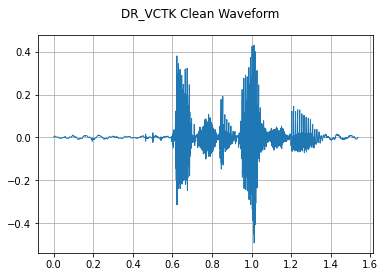

In [74]:
plot_waveform(clean_waveform, clean_waveform_sample_rate,"DR_VCTK Clean Waveform")
play_audio(clean_waveform, clean_waveform_sample_rate) 

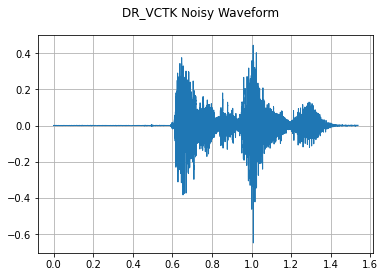

In [75]:
plot_waveform(noisy_waveform, noisy_waveform_sample_rate,"DR_VCTK Noisy Waveform")
play_audio(noisy_waveform, noisy_waveform_sample_rate) 

In [67]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

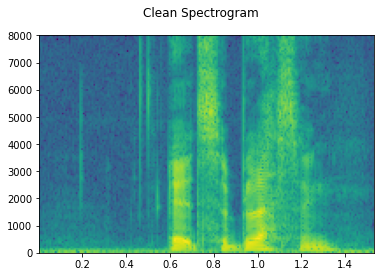

In [68]:
plot_specgram(clean_waveform, clean_waveform_sample_rate, title="Clean Spectrogram")

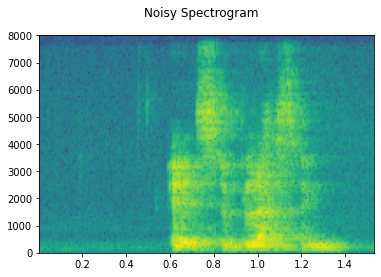

In [69]:
plot_specgram(noisy_waveform, noisy_waveform_sample_rate, title="Noisy Spectrogram")

In [ ]:
# Getting same visualizations for indian and english speech of same sentence 

Speaker ID: p248, Utterance ID: 001
Sample Transcript: PLEASE|CALL|STELLA|


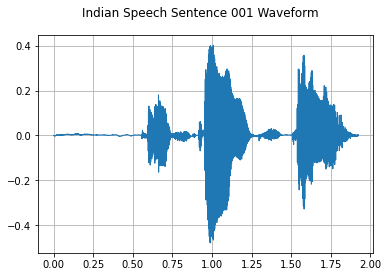

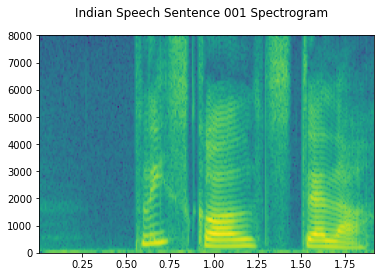

In [76]:
for file in onlyfiles:
  new_path = os.path.join(O2_PATH,file)
  waveform, sample_rate = torchaudio.load(new_path)

  if sample_rate != 16000:
    waveform = torchaudio.functional.resample(waveform, sample_rate, 16000)

  parsed_file = file.split('_')
  
  utterance_id_temp = parsed_file[2].split(".")
  utternace_id = utterance_id_temp[0]
  speaker_id = parsed_file[1]

  sample_transcript = speaker_utterance_final[speaker_id][utternace_id]


  
  print('Speaker ID: {}, Utterance ID: {}'.format(speaker_id, utternace_id))
  print("Sample Transcript: {}".format(sample_transcript))

  plot_waveform(waveform, 16000,"Indian Speech Sentence 001 Waveform")
  plot_specgram(waveform, 16000, title="Indian Speech Sentence 001 Spectrogram")
  play_audio(waveform, 16000) 


  break

In [71]:
mypath1 = "/content/drive/My Drive/DLS_Project/Dataset/English_Speakers/"
from os import listdir
from os.path import isfile, join
onlyfiles1 = [f for f in listdir(mypath1) if isfile(join(mypath1, f))]

Speaker ID: p225, Utterance ID: 001
Sample Transcript: PLEASE|CALL|STELLA|


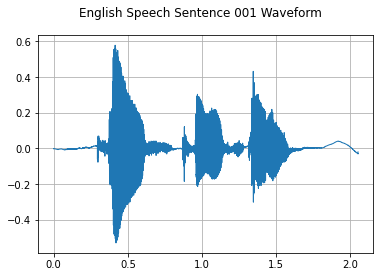

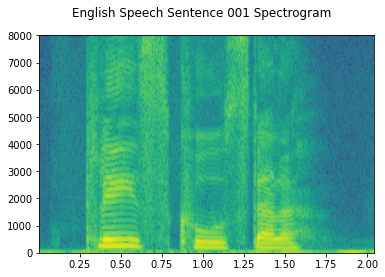

In [77]:
for file in onlyfiles1:
  new_path = os.path.join(O_PATH,file)
  waveform, sample_rate = torchaudio.load(new_path)

  if sample_rate != 16000:
    waveform = torchaudio.functional.resample(waveform, sample_rate, 16000)

  parsed_file = file.split('_')
  
  utterance_id_temp = parsed_file[2].split(".")
  utternace_id = utterance_id_temp[0]
  speaker_id = parsed_file[1]

  sample_transcript = speaker_utterance_final[speaker_id][utternace_id]


  
  print('Speaker ID: {}, Utterance ID: {}'.format(speaker_id, utternace_id))
  print("Sample Transcript: {}".format(sample_transcript))

  plot_waveform(waveform, 16000,"English Speech Sentence 001 Waveform")
  plot_specgram(waveform, 16000, title="English Speech Sentence 001 Spectrogram")
  play_audio(waveform, 16000) 

  break